In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier 
from sklearn.tree import plot_tree
from sklearn.metrics import accuracy_score

In [2]:
df=pd.read_csv("titanic .csv")
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [3]:
df.drop(["Cabin","Fare","Embarked","Ticket","SibSp","Parch","Name","PassengerId"],axis=1,inplace=True)

In [4]:
df

,Survived,Pclass,Sex,Age
0,0,3,male,22.0
1,1,1,female,38.0
2,1,3,female,26.0
3,1,1,female,35.0
4,0,3,male,35.0
...,...,...,...,...
886,0,2,male,27.0
887,1,1,female,19.0
888,0,3,female,NaN
889,1,1,male,26.0


In [5]:
df.replace({"Sex":{"female":0,"male":1}},inplace=True)
df

,Survived,Pclass,Sex,Age
0,0,3,1,22.0
1,1,1,0,38.0
2,1,3,0,26.0
3,1,1,0,35.0
4,0,3,1,35.0
...,...,...,...,...
886,0,2,1,27.0
887,1,1,0,19.0
888,0,3,0,NaN
889,1,1,1,26.0


In [6]:
df.isna()

,Survived,Pclass,Sex,Age
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,False,False
...,...,...,...,...
886,False,False,False,False
887,False,False,False,False
888,False,False,False,True
889,False,False,False,False


In [7]:
df["Null"]=df["Age"].isna()
df

,Survived,Pclass,Sex,Age,Null
0,0,3,1,22.0,False
1,1,1,0,38.0,False
2,1,3,0,26.0,False
3,1,1,0,35.0,False
4,0,3,1,35.0,False
...,...,...,...,...,...
886,0,2,1,27.0,False
887,1,1,0,19.0,False
888,0,3,0,NaN,True
889,1,1,1,26.0,False


In [8]:


df['Age'][df['Null']]=np.mean(df['Age'])


df


C:\Users\dell\AppData\Local\Temp\ipykernel_12128\764748047.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Age'][df['Null']]=np.mean(df['Age'])


,Survived,Pclass,Sex,Age,Null
0,0,3,1,22.000000,False
1,1,1,0,38.000000,False
2,1,3,0,26.000000,False
3,1,1,0,35.000000,False
4,0,3,1,35.000000,False
...,...,...,...,...,...
886,0,2,1,27.000000,False
887,1,1,0,19.000000,False
888,0,3,0,29.699118,True
889,1,1,1,26.000000,False


In [9]:
x=df[["Pclass","Sex","Age"]]
x

,Pclass,Sex,Age
0,3,1,22.000000
1,1,0,38.000000
2,3,0,26.000000
3,1,0,35.000000
4,3,1,35.000000
...,...,...,...
886,2,1,27.000000
887,1,0,19.000000
888,3,0,29.699118
889,1,1,26.000000


In [10]:
y=df["Survived"]
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [11]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [12]:
model1=DecisionTreeClassifier()
model1

DecisionTreeClassifier()

In [13]:
model1.fit(x_train,y_train)

DecisionTreeClassifier()

In [14]:
predictions=model1.predict(x_test)

In [15]:
score_training=accuracy_score(y_test,predictions)
score_testing=model1.score(x_test,y_test)
print(score_training)
print(score_testing)

0.7821229050279329
0.7821229050279329


In [16]:
from sklearn.linear_model import LogisticRegression
model2=LogisticRegression()

In [17]:
x_train

,Pclass,Sex,Age
719,3,1,33.000000
348,3,1,3.000000
559,3,0,36.000000
143,3,1,19.000000
697,3,0,29.699118
...,...,...,...
546,2,0,19.000000
386,3,1,1.000000
626,2,1,57.000000
433,3,1,17.000000


In [18]:
model2.fit(x_train,y_train)

LogisticRegression()

In [19]:
predictions2=model2.predict(x_test)

In [20]:
score_training=accuracy_score(y_test,predictions2)
score_testing=model2.score(x_test,y_test)
print(score_training)
print(score_testing)

0.8212290502793296
0.8212290502793296


In [21]:
## COMPARASION ##

# test par Decision Tree

In [22]:
liste=np.array([1,1,40])
print(liste)
pred_test=model1.predict([liste])
print(pred_test)

[ 1  1 40]
[0]


F:\Nouveau dossier\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


# test par regression logistique

In [23]:
liste=np.array([1,1,40])
print(liste)
pred_test=model2.predict([liste])
print(pred_test)

[ 1  1 40]
[0]


F:\Nouveau dossier\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


# TP N°7– Random Forest


In [24]:
dff=pd.read_csv("titanic .csv")
dff

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [25]:
dff.drop(["PassengerId","Name","Ticket"],axis=1,inplace=True)

In [26]:
dff.isna()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False
888,False,False,False,True,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False


In [27]:
dff['Age']=np.mean(dff['Age'])
dff

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,29.699118,1,0,7.2500,NaN,S
1,1,1,female,29.699118,1,0,71.2833,C85,C
2,1,3,female,29.699118,0,0,7.9250,NaN,S
3,1,1,female,29.699118,1,0,53.1000,C123,S
4,0,3,male,29.699118,0,0,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...
886,0,2,male,29.699118,0,0,13.0000,NaN,S
887,1,1,female,29.699118,0,0,30.0000,B42,S
888,0,3,female,29.699118,1,2,23.4500,NaN,S
889,1,1,male,29.699118,0,0,30.0000,C148,C


In [28]:
dff.replace({"Sex":{"female":0,"male":1}},inplace=True)
dff

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,1,29.699118,1,0,7.2500,NaN,S
1,1,1,0,29.699118,1,0,71.2833,C85,C
2,1,3,0,29.699118,0,0,7.9250,NaN,S
3,1,1,0,29.699118,1,0,53.1000,C123,S
4,0,3,1,29.699118,0,0,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...
886,0,2,1,29.699118,0,0,13.0000,NaN,S
887,1,1,0,29.699118,0,0,30.0000,B42,S
888,0,3,0,29.699118,1,2,23.4500,NaN,S
889,1,1,1,29.699118,0,0,30.0000,C148,C


In [29]:
dff['Cabin'].count()

204

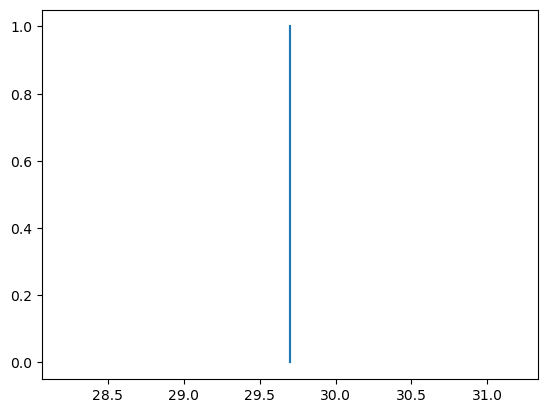

In [30]:
plt.plot(dff['Age'],dff['Survived'])
plt.show()

In [31]:
AgeB=dff[dff['Age'].between(0,30) & dff['Age'].between(31,60) & dff['Age'].between(61,100)]

In [32]:
AgeB

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked


In [33]:
AgeB=dff['Age'].between(0,30)

In [34]:
AgeB

0      True
1      True
2      True
3      True
4      True
       ... 
886    True
887    True
888    True
889    True
890    True
Name: Age, Length: 891, dtype: bool

In [35]:
bins = [16, 30, 60, 80]  
labels = ['16-30', '30-60', '60-80']
dff['AgeB'] = pd.cut(dff['Age'], bins=bins, labels=labels,right=False)
dff


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,AgeB
0,0,3,1,29.699118,1,0,7.2500,NaN,S,16-30
1,1,1,0,29.699118,1,0,71.2833,C85,C,16-30
2,1,3,0,29.699118,0,0,7.9250,NaN,S,16-30
3,1,1,0,29.699118,1,0,53.1000,C123,S,16-30
4,0,3,1,29.699118,0,0,8.0500,NaN,S,16-30
...,...,...,...,...,...,...,...,...,...,...
886,0,2,1,29.699118,0,0,13.0000,NaN,S,16-30
887,1,1,0,29.699118,0,0,30.0000,B42,S,16-30
888,0,3,0,29.699118,1,2,23.4500,NaN,S,16-30
889,1,1,1,29.699118,0,0,30.0000,C148,C,16-30


In [36]:
age_groups_mean = dff.groupby('AgeB')['Survived'].mean()

age_groups_sorted = age_groups_mean.sort_values(ascending=False)

In [37]:
age_groups_sorted

AgeB
16-30    0.383838
30-60         NaN
60-80         NaN
Name: Survived, dtype: float64

In [38]:
dff.replace({'AgeB':{'16-30':1,'30-60':2,'60-80':3}},inplace=True)

In [39]:
dff

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,AgeB
0,0,3,1,29.699118,1,0,7.2500,NaN,S,1
1,1,1,0,29.699118,1,0,71.2833,C85,C,1
2,1,3,0,29.699118,0,0,7.9250,NaN,S,1
3,1,1,0,29.699118,1,0,53.1000,C123,S,1
4,0,3,1,29.699118,0,0,8.0500,NaN,S,1
...,...,...,...,...,...,...,...,...,...,...
886,0,2,1,29.699118,0,0,13.0000,NaN,S,1
887,1,1,0,29.699118,0,0,30.0000,B42,S,1
888,0,3,0,29.699118,1,2,23.4500,NaN,S,1
889,1,1,1,29.699118,0,0,30.0000,C148,C,1


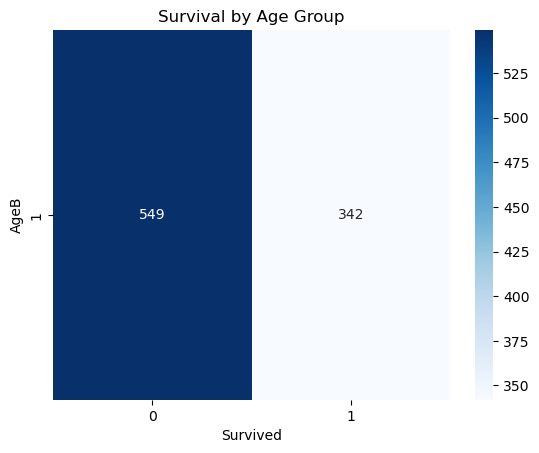

In [40]:
import seaborn as sns
cross_tab_age_survived = pd.crosstab(dff['AgeB'], dff['Survived'])

# Tracer le graphique en utilisant Seaborn
sns.heatmap(cross_tab_age_survived, annot=True, fmt='d', cmap='Blues', cbar=True)
plt.xlabel('Survived')
plt.ylabel('AgeB')
plt.title('Survival by Age Group')
plt.show()

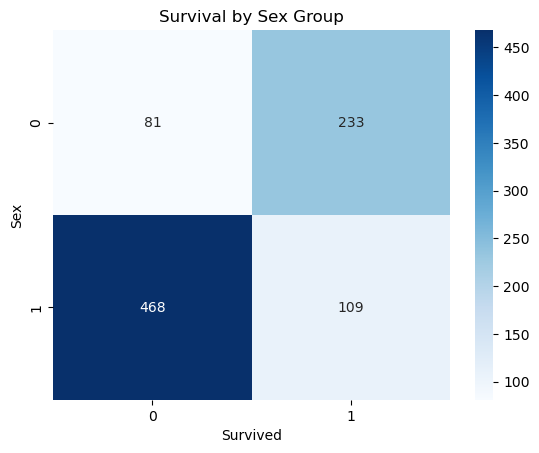

In [41]:
cross_tab_age_survived = pd.crosstab(dff['Sex'], dff['Survived'])

# Tracer le graphique en utilisant Seaborn
sns.heatmap(cross_tab_age_survived, annot=True, fmt='d', cmap='Blues', cbar=True)
plt.xlabel('Survived')
plt.ylabel('Sex')
plt.title('Survival by Sex Group')
plt.show()





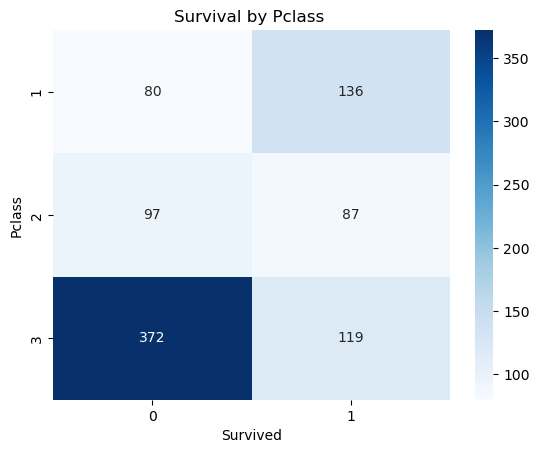

In [42]:
cross_tab_age_survived = pd.crosstab(dff['Pclass'], dff['Survived'])

# Tracer le graphique en utilisant Seaborn
sns.heatmap(cross_tab_age_survived, annot=True, fmt='d', cmap='Blues', cbar=True)
plt.xlabel('Survived')
plt.ylabel('Pclass')
plt.title('Survival by Pclass ')
plt.show()

In [43]:
dff['Fare'].max()

512.3292

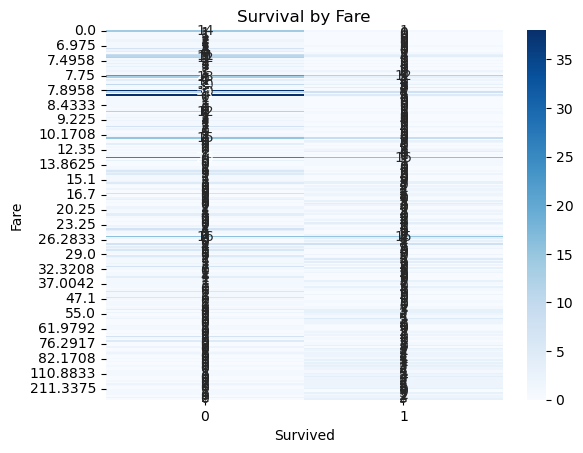

In [44]:
cross_tab_age_survived = pd.crosstab(dff['Fare'], dff['Survived'])

# Tracer le graphique en utilisant Seaborn
sns.heatmap(cross_tab_age_survived, annot=True, fmt='d', cmap='Blues', cbar=True)
plt.xlabel('Survived')
plt.ylabel('Fare')
plt.title('Survival by Fare')
plt.show()

In [45]:
bins = [0, 250, 400, 500, float('inf')]  
labels = ['0-250', '250-400', '400+']
#dff['fareGroupe'] = pd.cut(dff['Fare'], bins=bins, labels=labels,right=False)
#dff


In [46]:
#cross_tab_age_survived = pd.crosstab(dff['fareGroupe'], dff['Survived'])

# Tracer le graphique en utilisant Seaborn
#sns.heatmap(cross_tab_age_survived, annot=True, fmt='d', cmap='Blues', cbar=True)
#plt.xlabel('Survived')
#plt.ylabel('Fare')
#plt.title('Survival by FareGroupe')
#plt.show()

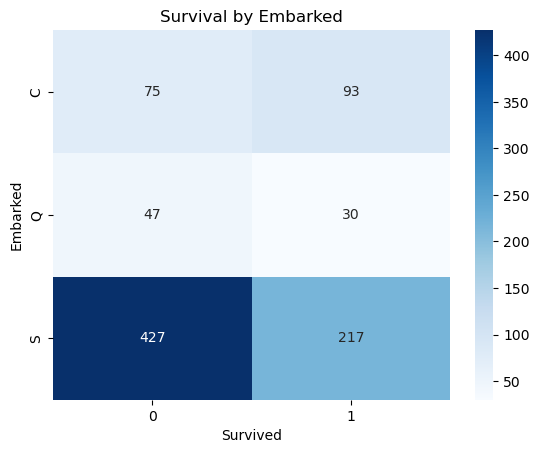

In [47]:
cross_tab_age_survived = pd.crosstab(dff['Embarked'], dff['Survived'])

# Tracer le graphique en utilisant Seaborn
sns.heatmap(cross_tab_age_survived, annot=True, fmt='d', cmap='Blues', cbar=True)
plt.xlabel('Survived')
plt.ylabel('Embarked')
plt.title('Survival by Embarked')
plt.show()

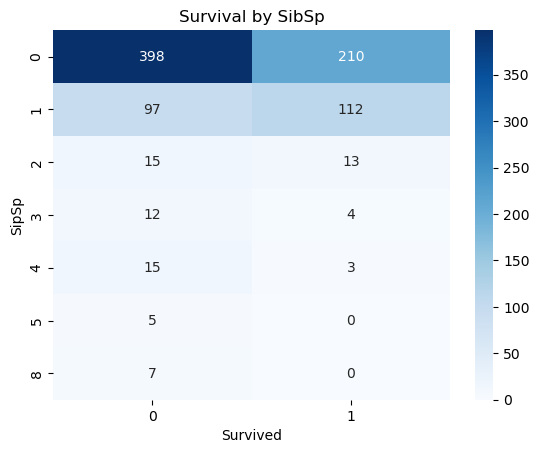

In [48]:
cross_tab_age_survived = pd.crosstab(dff['SibSp'], dff['Survived'])

# Tracer le graphique en utilisant Seaborn
sns.heatmap(cross_tab_age_survived, annot=True, fmt='d', cmap='Blues', cbar=True)
plt.xlabel('Survived')
plt.ylabel('SipSp')
plt.title('Survival by SibSp')
plt.show()

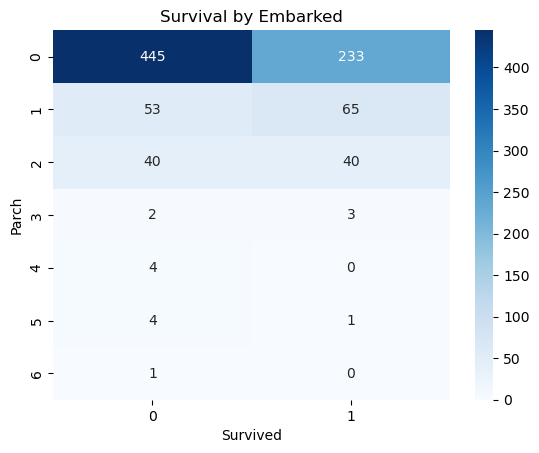

In [49]:
cross_tab_age_survived = pd.crosstab(dff['Parch'], dff['Survived'])

# Tracer le graphique en utilisant Seaborn
sns.heatmap(cross_tab_age_survived, annot=True, fmt='d', cmap='Blues', cbar=True)
plt.xlabel('Survived')
plt.ylabel('Parch')
plt.title('Survival by Embarked')
plt.show()

In [50]:
dff['FamilySize']=dff['SibSp']+dff['Parch']+1
dff

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,AgeB,FamilySize
0,0,3,1,29.699118,1,0,7.2500,NaN,S,1,2
1,1,1,0,29.699118,1,0,71.2833,C85,C,1,2
2,1,3,0,29.699118,0,0,7.9250,NaN,S,1,1
3,1,1,0,29.699118,1,0,53.1000,C123,S,1,2
4,0,3,1,29.699118,0,0,8.0500,NaN,S,1,1
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,1,29.699118,0,0,13.0000,NaN,S,1,1
887,1,1,0,29.699118,0,0,30.0000,B42,S,1,1
888,0,3,0,29.699118,1,2,23.4500,NaN,S,1,4
889,1,1,1,29.699118,0,0,30.0000,C148,C,1,1


In [51]:
#cross_tab_age_survived = pd.crosstab(dff['FamilySize'], dff['Survived'])

# Tracer le graphique en utilisant Seaborn
#sns.heatmap(cross_tab_age_survived, annot=True, fmt='d', cmap='Blues', cbar=True)
#plt.xlabel('Survived')
#plt.ylabel('FamilySize')
#plt.title('Survival by FamilySize')
#plt.show()

In [52]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

random_forest_model = RandomForestClassifier(n_estimators=100, random_state=42)


random_forest_model.fit(X_train, y_train)


y_pred = random_forest_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
accuracy

0.8212290502793296

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
random_forest = RandomForestClassifier()

parameters = {'n_estimators': [3,4,5,10,15,20,25,30,35,40,45],'criterion': ['entropy', 'gini'], 'max_depth': [2, 3, 5, 10]}

grid= GridSearchCV(random_forest, parameters, scoring=accuracy_score,cv=3)
grid = grid.fit(X_train, y_train)
clf = grid.best_estimator_
print(grid.best_estimator_)
"" Fit the best algorithm to the data.""
clf.fit(X_train, y_train)
print(clf.score(X_train,y_train))
print(clf.score(X_test,y_test))
print(clf.score(y_test,y))